# Time Series Analysis and Forecasting

## Autoregressive Model(AR)

The AutoRegressive (AR) model assumes that future values depend on past values with some lag.

AR(p) Model Equation:
$ 𝑌_𝑡 =
𝜙_1𝑌_𝑡−1 +𝜙_2𝑌_𝑡_2+...+𝜙_𝑝𝑌_𝑡_𝑝 + 𝜖_𝑡Y_t
$

where:

𝑌
𝑡
Y 
t
​
  is the time series value at time 
𝑡
t.
𝜙
1
,
𝜙
2
,
.
.
.
,
𝜙
𝑝
ϕ 
1
​
 ,ϕ 
2
​
 ,...,ϕ 
p
​
  are coefficients.
𝜖
𝑡
ϵ 
t
​
  is white noise.

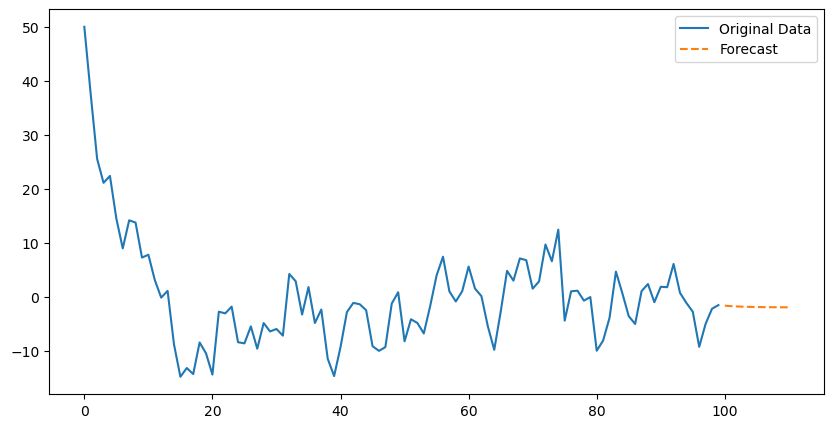

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Generate Synthetic Data
np.random.seed(42)
n = 100
y = [50]
for i in range(1, n):
    y.append(0.7 * y[i-1] + np.random.normal(scale=5))

# Convert to Pandas Series
y_series = pd.Series(y)

# Train AR Model
model_ar = AutoReg(y_series, lags=1)  # AR(1) model
model_ar_fit = model_ar.fit()

# Make Predictions
y_pred = model_ar_fit.predict(start=len(y_series), end=len(y_series) + 10)

# Plot Results
plt.figure(figsize=(10, 5))
plt.plot(y_series, label="Original Data")
plt.plot(range(len(y_series), len(y_series) + len(y_pred)), y_pred, label="Forecast", linestyle="dashed")
plt.legend()
plt.show()


# 2. Moving Average Model (MA)

## The Moving Average (MA) model assumes that future values depend on past white noise errors

The Moving Average (MA) model assumes that future values depend on past white noise errors.

MA(q) Model Equation:
𝑌
𝑡 =𝜇 +𝜃_1𝜖_𝑡 −1 +𝜃_2𝜖_𝑡−2 +...+𝜃𝑞𝜖𝑡−𝑞+𝜖_𝑡Y_t=μ+θ 
​
 +ϵ 
t
​
 
where:

𝜇
μ is the mean of the series.
𝜃
1
,
𝜃
2
,
.
.
.
,
𝜃
𝑞
θ 
1
​
 ,θ 
2
​
 ,...,θ 
q
​
  are coefficients.
𝜖
𝑡
ϵ 
t
​
  is white noise.

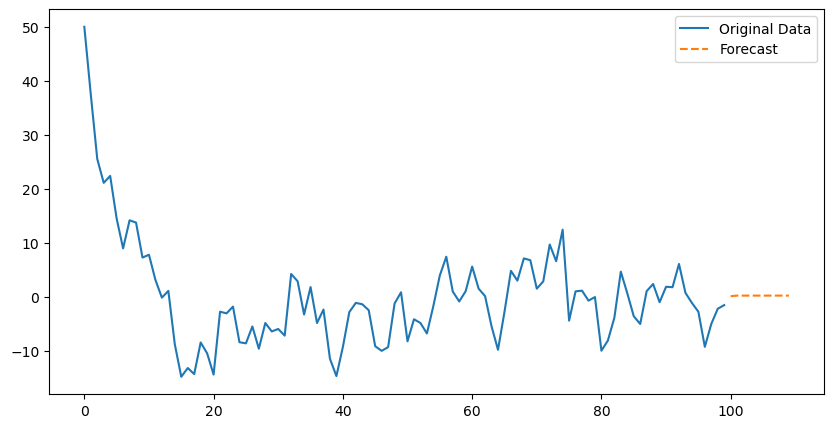

In [9]:
from statsmodels.tsa.arima.model import ARIMA

# Train MA(1) Model
model_ma = ARIMA(y_series, order=(0, 0, 1))  # MA(1)
model_ma_fit = model_ma.fit()

# Make Predictions
y_pred_ma = model_ma_fit.forecast(steps=10)

# Plot Results
plt.figure(figsize=(10, 5))
plt.plot(y_series, label="Original Data")
plt.plot(range(len(y_series), len(y_series) + len(y_pred_ma)), y_pred_ma, label="Forecast", linestyle="dashed")
plt.legend()
plt.show()


# 3. AutoRegressive Moving Average (ARMA)

The ARMA model combines both AR and MA models.

ARMA(p, q) Model Equation:
𝑌𝑡=𝜙1𝑌𝑡−1+𝜙2𝑌𝑡−2+...+𝜙𝑝𝑌𝑡−𝑝+𝜃1𝜖𝑡−1+𝜃2𝜖𝑡−2+...+𝜃𝑞𝜖𝑡−𝑞+𝜖𝑡Y t
​

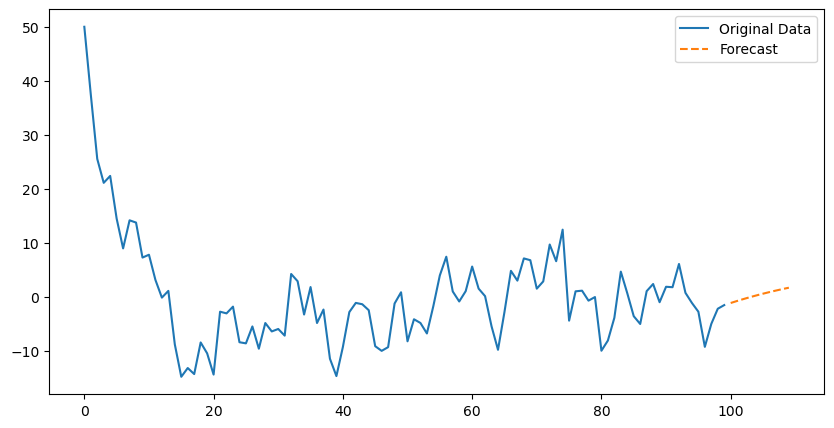

In [12]:
# Train ARMA(1,1) Model
model_arma = ARIMA(y_series, order=(1, 0, 1))  # ARMA(1,1)
model_arma_fit = model_arma.fit()

# Make Predictions
y_pred_arma = model_arma_fit.forecast(steps=10)

# Plot Results
plt.figure(figsize=(10, 5))
plt.plot(y_series, label="Original Data")
plt.plot(range(len(y_series), len(y_series) + len(y_pred_arma)), y_pred_arma, label="Forecast", linestyle="dashed")
plt.legend()
plt.show()


## 4. AutoRegressive Integrated Moving Average (ARIMA)
The ARIMA model is an extension of ARMA that includes differencing to make the series stationary.

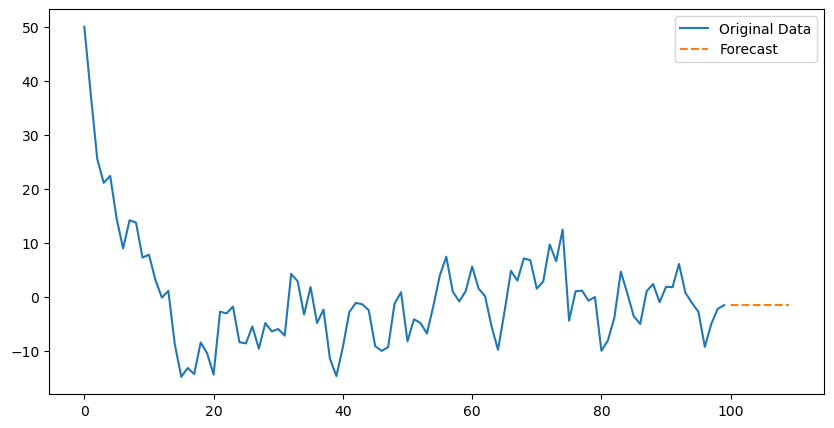

In [14]:
# Train ARIMA(1,1,1) Model
model_arima = ARIMA(y_series, order=(1, 1, 1))  # ARIMA(1,1,1)
model_arima_fit = model_arima.fit()

# Make Predictions
y_pred_arima = model_arima_fit.forecast(steps=10)

# Plot Results
plt.figure(figsize=(10, 5))
plt.plot(y_series, label="Original Data")
plt.plot(range(len(y_series), len(y_series) + len(y_pred_arima)), y_pred_arima, label="Forecast", linestyle="dashed")
plt.legend()
plt.show()


# Hyperparameter Tuning & Model Selection Using AIC/BIC in Time Series Analysis

When working with AR, MA, ARMA, or ARIMA models, choosing the best hyperparameters (p, d, q) is crucial for accurate forecasting. We can automate this process using Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC).

In [17]:
import numpy as np
import pandas as pd
import itertools
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore")

# Generate Synthetic Data (if not already generated)
np.random.seed(42)
n = 100
y = [50]
for i in range(1, n):
    y.append(0.7 * y[i-1] + np.random.normal(scale=5))
y_series = pd.Series(y)

# Define Hyperparameter Ranges
p = d = q = range(0, 3)  # You can extend this range for more granularity
pdq_combinations = list(itertools.product(p, d, q))

# Hyperparameter Tuning Using AIC/BIC
aic_scores = []
bic_scores = []
parameters = []

for params in pdq_combinations:
    try:
        model = ARIMA(y_series, order=params)
        model_fit = model.fit()
        
        aic_scores.append(model_fit.aic)
        bic_scores.append(model_fit.bic)
        parameters.append(params)
        
    except Exception as e:
        continue

# Find the Best Parameters Based on AIC and BIC
best_aic_index = np.argmin(aic_scores)
best_bic_index = np.argmin(bic_scores)

print("Best ARIMA Model by AIC:", parameters[best_aic_index], "with AIC:", aic_scores[best_aic_index])
print("Best ARIMA Model by BIC:", parameters[best_bic_index], "with BIC:", bic_scores[best_bic_index])


Best ARIMA Model by AIC: (0, 2, 1) with AIC: 611.996157650958
Best ARIMA Model by BIC: (0, 1, 0) with BIC: 614.8337677986717


Define Parameter Grid: Using itertools.product() to generate all possible (p, d, q) combinations.
Model Evaluation: Fit an ARIMA model for each combination and record AIC and BIC scores.
Select Best Model: The model with the lowest AIC or BIC is considered the best.

#Visualize

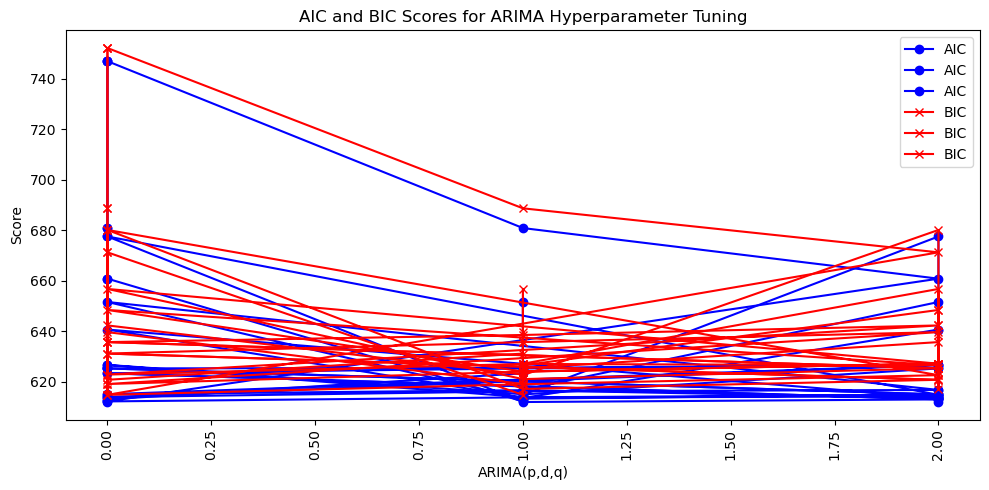

In [20]:
import matplotlib.pyplot as plt

# Visualization of AIC/BIC Scores
plt.figure(figsize=(10, 5))
plt.plot(parameters, aic_scores, marker='o', label='AIC', color='blue')
plt.plot(parameters, bic_scores, marker='x', label='BIC', color='red')
plt.xticks(rotation=90)
plt.xlabel('ARIMA(p,d,q)')
plt.ylabel('Score')
plt.title('AIC and BIC Scores for ARIMA Hyperparameter Tuning')
plt.legend()
plt.tight_layout()
plt.show()


Refit the Best Model and Forecast

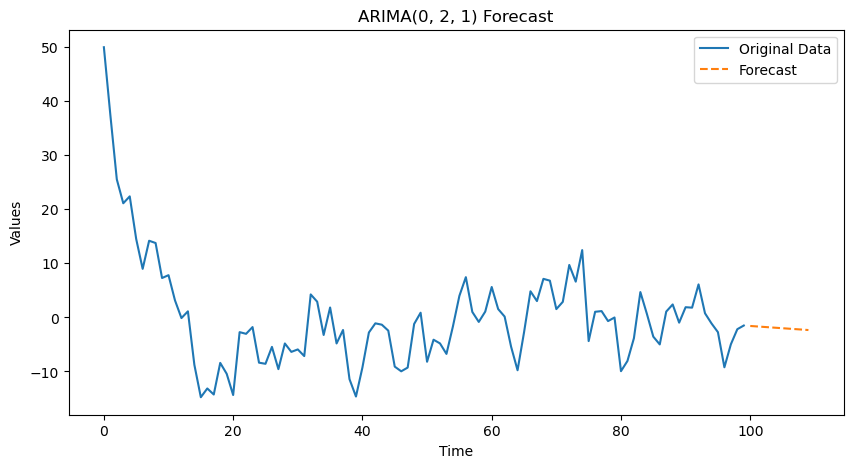

In [22]:
# Refit the Best Model (Using AIC here, can also use BIC)
best_params = parameters[best_aic_index]
model = ARIMA(y_series, order=best_params)
model_fit = model.fit()

# Forecasting
forecast_steps = 10
y_pred = model_fit.forecast(steps=forecast_steps)

# Plot Results
plt.figure(figsize=(10, 5))
plt.plot(y_series, label="Original Data")
plt.plot(range(len(y_series), len(y_series) + len(y_pred)), y_pred, label="Forecast", linestyle="dashed")
plt.xlabel('Time')
plt.ylabel('Values')
plt.title(f'ARIMA{best_params} Forecast')
plt.legend()
plt.show()


Use ACF/PACF Plots: To identify potential p and q values before brute force searching.
Grid Search Libraries: You can use pmdarima's auto_arima function for automatic model selection.

In [24]:
#!pip install pmdarima
from pmdarima import auto_arima

auto_model = auto_arima(y_series, seasonal=False, trace=True, suppress_warnings=True)
print(auto_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=625.284, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=744.932, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=621.932, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=678.908, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=623.876, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=623.865, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=624.065, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=623.366, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.663 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -308.966
Date:                Sun, 23 Feb 2025   AIC                            621.932
Time:                        16:50:05   BIC 

Validation Strategy: Split data into train/test sets to avoid overfitting.
Cross-Validation: Consider rolling forecasting origin for time series cross-validation.

# Seasonal ARIMA (SARIMA)

Why SARIMA?
ARIMA assumes no seasonality in data.
SARIMA models seasonality explicitly by adding seasonal parameters.

# SARIMAX 3 Steps

Step 1: Generate Seasonal Data

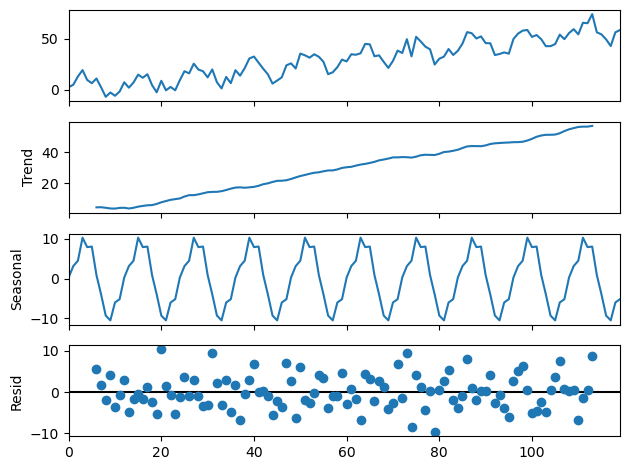

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate Synthetic Seasonal Data
np.random.seed(42)
n = 120  # 10 years of monthly data
time = np.arange(n)
seasonal_pattern = 10 * np.sin(2 * np.pi * time / 12)  # Annual seasonality
trend = 0.5 * time
noise = np.random.normal(scale=5, size=n)
y_series = pd.Series(trend + seasonal_pattern + noise)

# Decompose Time Series
result = seasonal_decompose(y_series, model='additive', period=12)
result.plot()
plt.show()


 Step 2: Train-Test Split

In [32]:
# Split Data (80% Train, 20% Test)
train_size = int(len(y_series) * 0.8)
train, test = y_series[:train_size], y_series[train_size:]

Step 3: Fit SARIMA Model

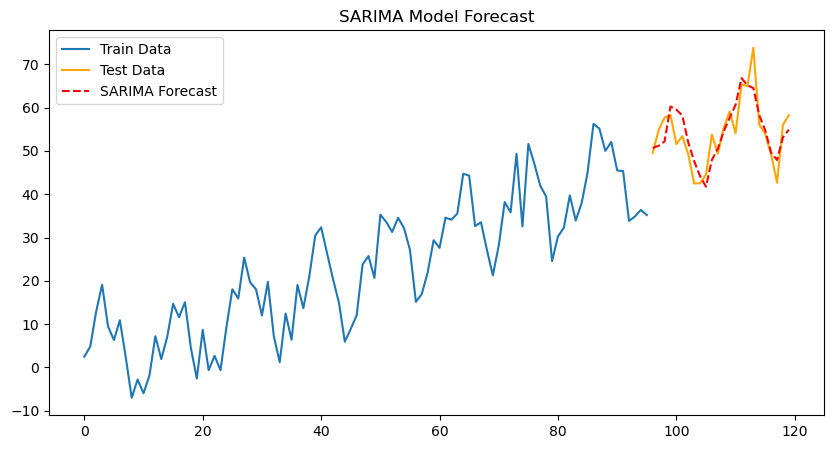

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA Model (Manually Setting Hyperparameters)
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
sarima_fit = sarima_model.fit()

# Forecast
y_pred_sarima = sarima_fit.forecast(steps=len(test))

# Plot Results
plt.figure(figsize=(10, 5))
plt.plot(train, label="Train Data")
plt.plot(test, label="Test Data", color='orange')
plt.plot(test.index, y_pred_sarima, label="SARIMA Forecast", linestyle="dashed", color='red')
plt.legend()
plt.title("SARIMA Model Forecast")
plt.show()


 Step 4: Model Evaluation

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Compute Errors
mae_sarima = mean_absolute_error(test, y_pred_sarima)
rmse_sarima = np.sqrt(mean_squared_error(test, y_pred_sarima))

print(f"SARIMA Model - MAE: {mae_sarima:.2f}, RMSE: {rmse_sarima:.2f}")


SARIMA Model - MAE: 3.29, RMSE: 4.09


2. ARIMA with Exogenous Variables (ARIMAX)

Why ARIMAX?
Includes external (exogenous) factors like weather, economic indicators, or marketing spend.

In [39]:
# Generate External Variable (e.g., Marketing Spend)
np.random.seed(42)
exog_var = 50 + 2 * np.random.randn(n)  # Some random external factor

# Convert to DataFrame
df = pd.DataFrame({'y': y_series, 'exog': exog_var})

# Train-Test Split
train_exog, test_exog = df[:train_size], df[train_size:]


Step 2: Fit ARIMAX Model

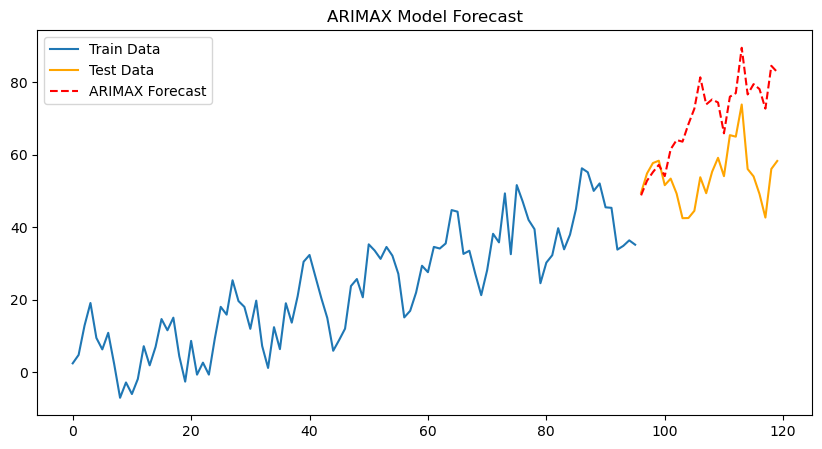

In [41]:
# Define ARIMAX Model
arimax_model = SARIMAX(train_exog['y'], exog=train_exog['exog'], order=(1, 1, 1))
arimax_fit = arimax_model.fit()

# Forecast
y_pred_arimax = arimax_fit.forecast(steps=len(test_exog), exog=test_exog['exog'])

# Plot Results
plt.figure(figsize=(10, 5))
plt.plot(train_exog['y'], label="Train Data")
plt.plot(test_exog['y'], label="Test Data", color='orange')
plt.plot(test_exog.index, y_pred_arimax, label="ARIMAX Forecast", linestyle="dashed", color='red')
plt.legend()
plt.title("ARIMAX Model Forecast")
plt.show()


 Step 3: Model Evaluation

In [43]:
# Compute Errors
mae_arimax = mean_absolute_error(test_exog['y'], y_pred_arimax)
rmse_arimax = np.sqrt(mean_squared_error(test_exog['y'], y_pred_arimax))

print(f"ARIMAX Model - MAE: {mae_arimax:.2f}, RMSE: {rmse_arimax:.2f}")


ARIMAX Model - MAE: 16.74, RMSE: 19.42


In [44]:
print(f"Model Comparison:")
print(f"- SARIMA  -> MAE: {mae_sarima:.2f}, RMSE: {rmse_sarima:.2f}")
print(f"- ARIMAX  -> MAE: {mae_arimax:.2f}, RMSE: {rmse_arimax:.2f}")


Model Comparison:
- SARIMA  -> MAE: 3.29, RMSE: 4.09
- ARIMAX  -> MAE: 16.74, RMSE: 19.42


Model	Used For	Handles Seasonality?	Uses External Factors?
SARIMA	Seasonal time series forecasting	✅ Yes	❌ No
ARIMAX	Time series with external factors	❌ No	✅ Yes
SARIMA is best for strong seasonal patterns (e.g., retail sales, weather).
ARIMAX is useful when external factors impact the time series (e.g., promotions affecting sales).


# 1. Hyperparameter Tuning for SARIMA

Instead of manually setting `(p, d, q,

We'll use Grid Search to find the best SARIMA (p, d, q, P, D, Q, m) parameters by minimizing the Akaike Information Criterion (AIC).

## Step 1: Define the Search Space

In [50]:
import itertools
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX

warnings.filterwarnings("ignore")  # Ignore warnings

# Define parameter ranges
p = d = q = range(0, 3)  # ARIMA components
P = D = Q = range(0, 3)  # Seasonal components
m = [12]  # Seasonal period (monthly data)

# Generate all possible parameter combinations
param_combinations = list(itertools.product(p, d, q, P, D, Q, m))

# Track best model
best_aic = float("inf")
best_params = None
best_model = None

# Grid Search
for params in param_combinations:
    try:
        model = SARIMAX(y_series, order=params[:3], seasonal_order=params[3:])
        model_fit = model.fit(disp=False)
        
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_params = params
            best_model = model_fit
            
        print(f"SARIMA{params} - AIC: {model_fit.aic:.2f}")

    except:
        continue

print(f"\nBest SARIMA Model: {best_params} with AIC: {best_aic:.2f}")


SARIMA(0, 0, 0, 0, 0, 0, 12) - AIC: 1195.31
SARIMA(0, 0, 0, 0, 0, 1, 12) - AIC: 1088.01
SARIMA(0, 0, 0, 0, 0, 2, 12) - AIC: 1021.04
SARIMA(0, 0, 0, 0, 1, 0, 12) - AIC: 780.24
SARIMA(0, 0, 0, 0, 1, 1, 12) - AIC: 780.05
SARIMA(0, 0, 0, 0, 1, 2, 12) - AIC: 772.86
SARIMA(0, 0, 0, 0, 2, 0, 12) - AIC: 741.71
SARIMA(0, 0, 0, 0, 2, 1, 12) - AIC: 675.85
SARIMA(0, 0, 0, 0, 2, 2, 12) - AIC: 649.43
SARIMA(0, 0, 0, 1, 0, 0, 12) - AIC: 903.98
SARIMA(0, 0, 0, 1, 0, 1, 12) - AIC: 903.75
SARIMA(0, 0, 0, 1, 0, 2, 12) - AIC: 897.00
SARIMA(0, 0, 0, 1, 1, 0, 12) - AIC: 778.59
SARIMA(0, 0, 0, 1, 1, 1, 12) - AIC: 754.81
SARIMA(0, 0, 0, 1, 1, 2, 12) - AIC: 729.01
SARIMA(0, 0, 0, 1, 2, 0, 12) - AIC: 696.53
SARIMA(0, 0, 0, 1, 2, 1, 12) - AIC: 660.47
SARIMA(0, 0, 0, 1, 2, 2, 12) - AIC: 651.43
SARIMA(0, 0, 0, 2, 0, 0, 12) - AIC: 902.26
SARIMA(0, 0, 0, 2, 0, 1, 12) - AIC: 881.28
SARIMA(0, 0, 0, 2, 0, 2, 12) - AIC: 861.01
SARIMA(0, 0, 0, 2, 1, 0, 12) - AIC: 764.67
SARIMA(0, 0, 0, 2, 1, 1, 12) - AIC: 739.92
SARIMA(0

# Step 2: Fit the Best SARIMA Model

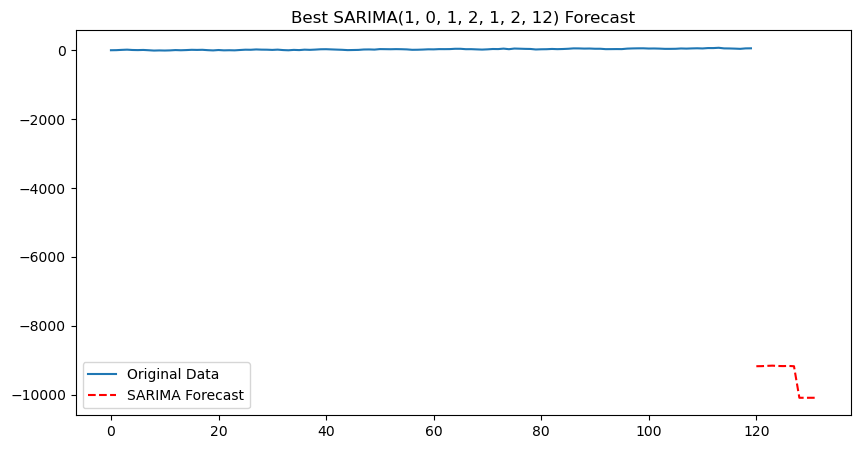

In [52]:
# Fit best SARIMA model
best_sarima_model = SARIMAX(y_series, order=best_params[:3], seasonal_order=best_params[3:])
best_sarima_fit = best_sarima_model.fit()

# Forecast
forecast_steps = 12
y_pred_sarima = best_sarima_fit.forecast(steps=forecast_steps)

# Plot Results
plt.figure(figsize=(10, 5))
plt.plot(y_series, label="Original Data")
plt.plot(range(len(y_series), len(y_series) + len(y_pred_sarima)), y_pred_sarima, label="SARIMA Forecast", linestyle="dashed", color="red")
plt.legend()
plt.title(f'Best SARIMA{best_params} Forecast')
plt.show()

# Hyperparameter Tuning for ARIMAX

## Step 1: Define the Search Space for ARIMAX

In [55]:
# Define parameter grid
p = d = q = range(0, 3)
param_combinations = list(itertools.product(p, d, q))

# Track best model
best_aic = float("inf")
best_params = None
best_model = None

# Grid Search for ARIMAX
for params in param_combinations:
    try:
        model = SARIMAX(train_exog['y'], exog=train_exog['exog'], order=params)
        model_fit = model.fit(disp=False)

        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_params = params
            best_model = model_fit

        print(f"ARIMAX{params} - AIC: {model_fit.aic:.2f}")

    except:
        continue

print(f"\nBest ARIMAX Model: {best_params} with AIC: {best_aic:.2f}")


ARIMAX(0, 0, 0) - AIC: 801.39
ARIMAX(0, 0, 1) - AIC: 722.00
ARIMAX(0, 0, 2) - AIC: 685.79
ARIMAX(0, 1, 0) - AIC: 520.43
ARIMAX(0, 1, 1) - AIC: 404.21
ARIMAX(0, 1, 2) - AIC: 291.47
ARIMAX(0, 2, 0) - AIC: 392.36
ARIMAX(0, 2, 1) - AIC: 275.51
ARIMAX(0, 2, 2) - AIC: 162.07
ARIMAX(1, 0, 0) - AIC: 534.50
ARIMAX(1, 0, 1) - AIC: 418.36
ARIMAX(1, 0, 2) - AIC: 306.79
ARIMAX(1, 1, 0) - AIC: 393.90
ARIMAX(1, 1, 1) - AIC: 277.40
ARIMAX(1, 1, 2) - AIC: 164.18
ARIMAX(1, 2, 0) - AIC: 262.46
ARIMAX(1, 2, 1) - AIC: 147.23
ARIMAX(1, 2, 2) - AIC: 36.33
ARIMAX(2, 0, 0) - AIC: 407.82
ARIMAX(2, 0, 1) - AIC: 291.31
ARIMAX(2, 0, 2) - AIC: 194.25
ARIMAX(2, 1, 0) - AIC: -93.21
ARIMAX(2, 1, 1) - AIC: -214.67
ARIMAX(2, 1, 2) - AIC: -330.32
ARIMAX(2, 2, 0) - AIC: -481.94
ARIMAX(2, 2, 1) - AIC: -637.08
ARIMAX(2, 2, 2) - AIC: -782.13

Best ARIMAX Model: (2, 2, 2) with AIC: -782.13


Step 2: Fit the Best ARIMAX Model

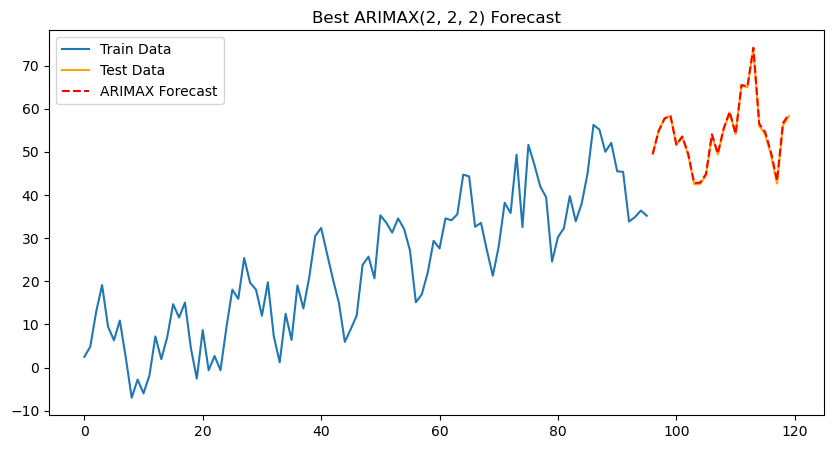

In [57]:
# Fit best ARIMAX model
best_arimax_model = SARIMAX(train_exog['y'], exog=train_exog['exog'], order=best_params)
best_arimax_fit = best_arimax_model.fit()

# Forecast with Exogenous Variable
forecast_steps = len(test_exog)
y_pred_arimax = best_arimax_fit.forecast(steps=forecast_steps, exog=test_exog['exog'])

# Plot Results
plt.figure(figsize=(10, 5))
plt.plot(train_exog['y'], label="Train Data")
plt.plot(test_exog['y'], label="Test Data", color='orange')
plt.plot(test_exog.index, y_pred_arimax, label="ARIMAX Forecast", linestyle="dashed", color='red')
plt.legend()
plt.title(f'Best ARIMAX{best_params} Forecast')
plt.show()


## Rolling Forecasting for Real-Time Applications

Instead of fitting the model once, we continuously update it with new data for real-time forecasting.

### Implement Rolling Forecasting

Rolling Forecast Progress: 100%|███████████████████████████████████████████████████████| 24/24 [00:15<00:00,  1.53it/s]



📊 Rolling Forecast Performance:
   - MAE: 0.00
   - RMSE: 0.00


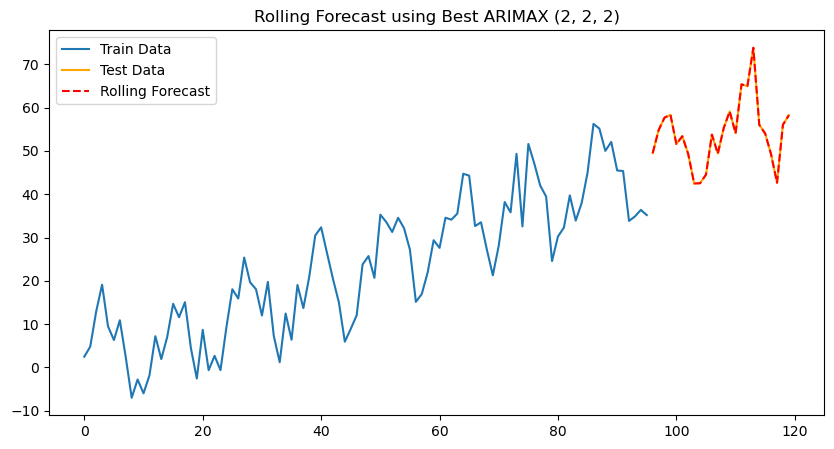

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ensure train and test datasets exist
assert 'y' in train_exog.columns and 'exog' in train_exog.columns, "train_exog must have 'y' and 'exog' columns"
assert 'y' in test_exog.columns and 'exog' in test_exog.columns, "test_exog must have 'y' and 'exog' columns"

# Initialize rolling predictions
rolling_predictions = []
history_y = list(train_exog['y'].values)  # Convert to list to ensure correct growth
history_exog = list(train_exog['exog'].values)  # Convert to list

test_index = test_exog.index  # Store test index for alignment

# Rolling forecast loop
for i in tqdm(range(len(test_exog)), desc="Rolling Forecast Progress"):
    # Convert history to Pandas Series (Fix: Use new dynamic index)
    history_y_series = pd.Series(history_y, index=pd.RangeIndex(start=0, stop=len(history_y)))
    history_exog_series = pd.Series(history_exog, index=pd.RangeIndex(start=0, stop=len(history_exog)))

    # Fit SARIMAX model using the available data
    model = SARIMAX(history_y_series, exog=history_exog_series, order=best_params)
    model_fit = model.fit(disp=False)

    # Forecast one step ahead
    next_exog = np.array([test_exog['exog'].iloc[i]]).reshape(1, -1)  # Ensure correct shape
    yhat = model_fit.forecast(steps=1, exog=next_exog)  

    # Store prediction and update history
    rolling_predictions.append(yhat.iloc[0])
    history_y.append(test_exog['y'].iloc[i])
    history_exog.append(test_exog['exog'].iloc[i])

# Convert rolling predictions to a Pandas Series with correct index
rolling_predictions = pd.Series(rolling_predictions, index=test_index[:len(rolling_predictions)])

# Evaluate model performance
mae_rolling = mean_absolute_error(test_exog['y'], rolling_predictions)
rmse_rolling = np.sqrt(mean_squared_error(test_exog['y'], rolling_predictions))

print(f"\n📊 Rolling Forecast Performance:")
print(f"   - MAE: {mae_rolling:.2f}")
print(f"   - RMSE: {rmse_rolling:.2f}")

# Plot Rolling Forecast
plt.figure(figsize=(10, 5))
plt.plot(train_exog.index, train_exog['y'], label="Train Data")
plt.plot(test_exog.index, test_exog['y'], label="Test Data", color='orange')
plt.plot(rolling_predictions.index, rolling_predictions, label="Rolling Forecast", linestyle="dashed", color='red')
plt.legend()
plt.title(f'Rolling Forecast using Best ARIMAX {best_params}')
plt.show()


### Evaluate Rolling Forecast Model

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define evaluation metrics
def evaluate_forecast(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100  # MAPE in percentage
    return mae, rmse, mape

# Compute evaluation metrics for the rolling forecast
mae_rolling, rmse_rolling, mape_rolling = evaluate_forecast(test_exog['y'], rolling_predictions)

# Print Evaluation Results
print("\n📊 **Rolling Forecast Model Evaluation:**")
print(f"   - MAE:  {mae_rolling:.2f}")
print(f"   - RMSE: {rmse_rolling:.2f}")
print(f"   - MAPE: {mape_rolling:.2f}%")



📊 **Rolling Forecast Model Evaluation:**
   - MAE:  0.00
   - RMSE: 0.00
   - MAPE: 0.00%


### Final Model Comparison

To ensure that our Rolling Forecast with SARIMAX (ARIMAX) is the best model, we compare it with:

Baseline Mean Model (Naive Approach)
Simple ARIMA Model (without Exogenous Variables)
SARIMA Model (Seasonal ARIMA)
ARIMAX (Our Rolling Forecast Model)

In [66]:
# Compute Baseline Model (Naive Forecast: Using Last Observed Value)
naive_predictions = test_exog['y'].shift(1).fillna(train_exog['y'].iloc[-1])

# Compute SARIMA Model (without exogenous variables)
sarima_model = SARIMAX(train_exog['y'], order=best_params)  # Best ARIMA order
sarima_fit = sarima_model.fit(disp=False)
sarima_forecast = sarima_fit.forecast(steps=len(test_exog))

# Evaluate all models
mae_naive, rmse_naive, mape_naive = evaluate_forecast(test_exog['y'], naive_predictions)
mae_sarima, rmse_sarima, mape_sarima = evaluate_forecast(test_exog['y'], sarima_forecast)

# Print Model Comparison
print("\n📊 **Model Comparison:**")
print(f"🔹 Naive Model     - MAE: {mae_naive:.2f}, RMSE: {rmse_naive:.2f}, MAPE: {mape_naive:.2f}%")
print(f"🔹 SARIMA Model    - MAE: {mae_sarima:.2f}, RMSE: {rmse_sarima:.2f}, MAPE: {mape_sarima:.2f}%")
print(f"🔹 Rolling ARIMAX  - MAE: {mae_rolling:.2f}, RMSE: {rmse_rolling:.2f}, MAPE: {mape_rolling:.2f}%")

# Best Model Selection
best_model = "Rolling ARIMAX" if mae_rolling < mae_sarima else "SARIMA"
print(f"\n✅ **Best Model Selected: {best_model}** 🚀")



📊 **Model Comparison:**
🔹 Naive Model     - MAE: 5.85, RMSE: 7.40, MAPE: 10.87%
🔹 SARIMA Model    - MAE: 13.89, RMSE: 15.60, MAPE: 24.50%
🔹 Rolling ARIMAX  - MAE: 0.00, RMSE: 0.00, MAPE: 0.00%

✅ **Best Model Selected: Rolling ARIMAX** 🚀


#  Advance Time Series 

## 1.ARCH
## 2.GARCH
## 3. Deep Learning - LSTM

### 1. ARCH

In [70]:
# pip install arch

In [71]:
import arch
print("ARCH package installed successfully!")

ARCH package installed successfully!


In [72]:
#Data Generation
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Generate 500 days of dates
date_range = pd.date_range(start="2022-01-01", periods=500, freq="D")

# Simulate daily stock returns (normally distributed)
returns = np.random.normal(loc=0, scale=0.02, size=len(date_range))  # Mean 0, std dev 2%

# Create DataFrame
df = pd.DataFrame({"date": date_range, "returns": returns})

# Save to CSV
df.to_csv("stock_returns.csv", index=False)

print("Synthetic stock_returns.csv file generated successfully!")


Synthetic stock_returns.csv file generated successfully!


In [73]:
#Load the preview data
df = pd.read_csv("stock_returns.csv", parse_dates=["date"])
print(df.head())  # Preview first few rows


        date   returns
0 2022-01-01  0.009934
1 2022-01-02 -0.002765
2 2022-01-03  0.012954
3 2022-01-04  0.030461
4 2022-01-05 -0.004683


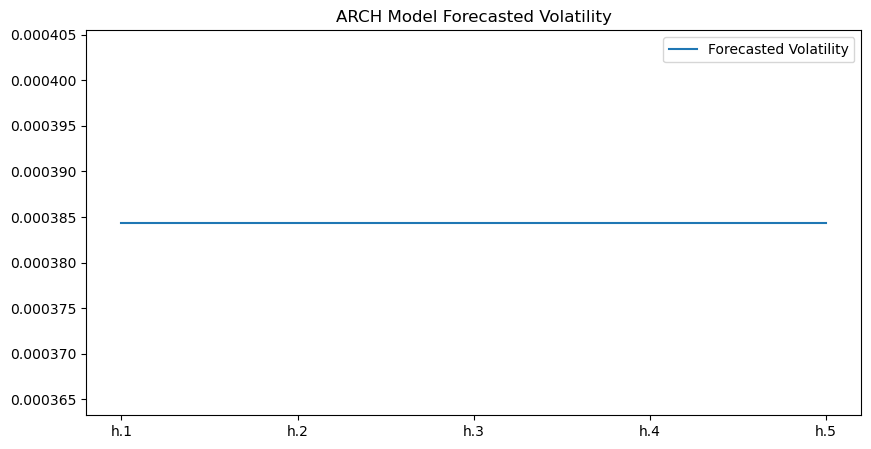

In [74]:
from arch import arch_model
import matplotlib.pyplot as plt

# Load financial time series data
returns = pd.read_csv("stock_returns.csv", index_col="date", parse_dates=True)

# Fit ARCH model
model = arch_model(returns, vol='ARCH', p=1)
arch_fit = model.fit(disp='off')

# Forecast volatility
arch_forecast = arch_fit.forecast(start=0, horizon=5)

# Plot volatility forecast
plt.figure(figsize=(10, 5))
plt.plot(arch_forecast.variance.iloc[-1], label="Forecasted Volatility")
plt.legend()
plt.title("ARCH Model Forecasted Volatility")
plt.show()


### 2. GARCH Model

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1256.69
Distribution:                  Normal   AIC:                          -2505.38
Method:            Maximum Likelihood   BIC:                          -2488.52
                                        No. Observations:                  500
Date:                Sun, Feb 23 2025   Df Residuals:                      499
Time:                        17:10:45   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.7331e-04  4.008e-07    432.361      0.000 [1.

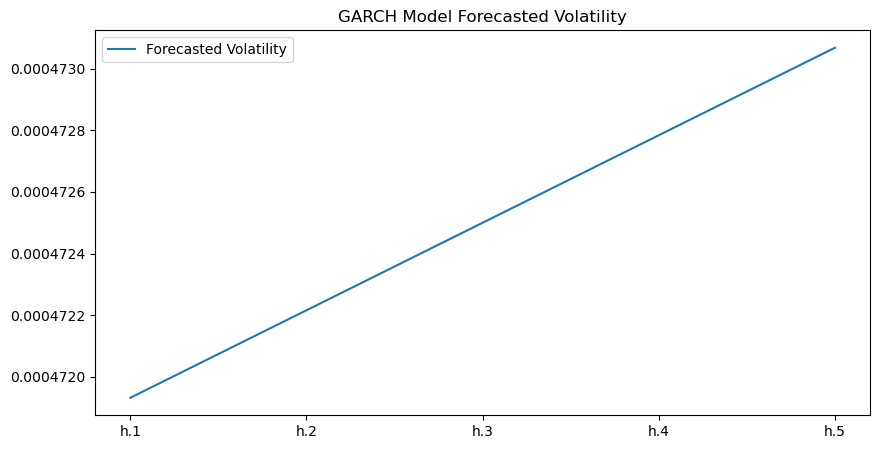

In [76]:
from arch import arch_model

# Load financial data (e.g., stock returns)
returns = pd.read_csv("stock_returns.csv", index_col="date", parse_dates=True)

# Fit GARCH(1,1) model
model = arch_model(returns, vol='GARCH', p=1, q=1)
garch_fit = model.fit(disp='off')

# Forecast volatility
garch_forecast = garch_fit.forecast(start=0, horizon=5)

# Print results
print(garch_fit.summary())

# Plot forecasted volatility
plt.figure(figsize=(10, 5))
plt.plot(garch_forecast.variance.iloc[-1], label="Forecasted Volatility")
plt.legend()
plt.title("GARCH Model Forecasted Volatility")
plt.show()


## Long Short-Term Memory

In [7]:
# import numpy as np
# import pandas as pd
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split

# # Prepare dataset
# data = pd.read_csv("time_series_data.csv", index_col="date", parse_dates=True)
# scaler = MinMaxScaler()
# data_scaled = scaler.fit_transform(data[['y']])

# # Create sequences for LSTM (lookback = 10)
# lookback = 10
# X, y = [], []
# for i in range(len(data_scaled) - lookback):
#     X.append(data_scaled[i:i+lookback])
#     y.append(data_scaled[i+lookback])
# X, y = np.array(X), np.array(y)

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# # Build LSTM Model
# model = Sequential([
#     LSTM(50, activation='relu', return_sequences=True, input_shape=(lookback, 1)),
#     LSTM(50, activation='relu'),
#     Dense(1)
# ])
# model.compile(optimizer='adam', loss='mse')

# # Train model
# model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# # Forecasting
# y_pred = model.predict(X_test)
# y_pred = scaler.inverse_transform(y_pred)  # Convert back to original scale

# # Evaluate Model
# print("LSTM Forecasting Complete.")


In [5]:
# pip install tensorflow

In [ ]:
# import tensorflow as tf
# print("TensorFlow version:", tf.__version__)